In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import logging

In [2]:
# Functions for lines
class SlopeLine():
    """ a line defined by slope and intercept """
    def __init__(self, m, b):
        self.m = m
        self.b = b
        
    def y(self, x):
        return self.m * x + self.b
    
    def x(self, y):
        return (y - self.b) / self.m

def get_slope_line(point_1, point_2):
    """returns slope line object with line determined by the points
    where point_i = (x, y)"""
    
    m = (point_2[1] - point_1[1]) / (point_2[0] - point_1[0])
    b = point_1[1] - m * point_1[0]
    
    return SlopeLine(m, b)

# Functions to generate points
class Inequality():
    """
    given a function f(x) of one variable.
    we will test y < f(x) or y > f(x)
    for a point (x, y)
    """
    def __init__(self, func, ineq_type):
        self.func = func
        
        if ineq_type == '<':
            self.eval = self.less_than
        elif ineq_type == '>':
            self.eval = self.greater_than
        else:
            raise Exception("ineq_type must be '>' or '<'")
        
    def less_than(self, point):
        return point[:,1] < self.func(point[:,0])
    
    def greater_than(self, point):
        return point[:,1] > self.func(point[:,0])
    

def generate_points(n, inequality_lists, random_seed=47):
    """ get n points in the 10x10 square classified by
    inequalities.
    
    inequality_lists should be a list of lists of inequalities.
    
    Points are evaluated to the positive class (1) by the
    interior lists if all the inequalities in that list
    are satisfied. Then, if any of the the interior lists
    return true, the point is classified as true.
    
    """
    np.random.seed(random_seed)
    
    data_x = np.random.uniform(0, 10, (n, 2))
    
    def evaluate_list(inequality_list):
        
        evals = np.array([ineq.eval(data_x) for ineq in inequality_list]) \
                  .transpose()
        return np.array([all(p) for p in evals])
    
    all_evals = np.array([evaluate_list(il) for il in inequality_lists]) \
                  .transpose()
    
    data_y = np.array([1 if any(p) else -1 for p in all_evals])
    
    data = {
        'x_1': data_x[:,0]
        ,'x_2': data_x[:,1]
        ,'y': data_y
    }
    return pd.DataFrame(data)

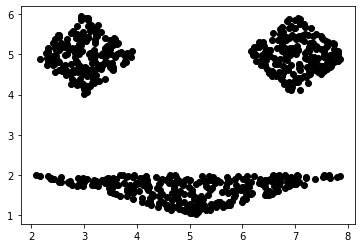

In [3]:
eye_1 = np.array([
    [2, 5]
    ,[3, 6]
    ,[4, 5]
    ,[3, 4]
    ,[2, 5]
])
eye_2 = eye_1 + [4, 0]
mouth = np.array([[2, 2], [8, 2], [5, 1], [2, 2]])

lines_eye_1 = [get_slope_line(eye_1[i], eye_1[i+1]) for i in range(len(eye_1) - 1)]
lines_eye_2 = [get_slope_line(eye_2[i], eye_2[i+1]) for i in range(len(eye_2) - 1)]
lines_mouth = [get_slope_line(mouth[i], mouth[i+1]) for i in range(len(mouth) - 1)]

ineq_eye_1 = [Inequality(lines_eye_1[0].y, '<'), Inequality(lines_eye_1[1].y, '<'),
              Inequality(lines_eye_1[2].y, '>'), Inequality(lines_eye_1[3].y, '>')]

ineq_eye_2 = [Inequality(lines_eye_2[0].y, '<'), Inequality(lines_eye_2[1].y, '<'),
              Inequality(lines_eye_2[2].y, '>'), Inequality(lines_eye_2[3].y, '>')]

ineq_mouth = [Inequality(lines_mouth[0].y, '<'), Inequality(lines_mouth[1].y, '>'), 
              Inequality(lines_mouth[2].y, '>')]

df = generate_points(10000, [ineq_eye_1, ineq_eye_2, ineq_mouth])

c = df['y'] == 1

plt.plot(df[c].x_1, df[c].x_2, 'ko')
#plt.plot(df[~c].x_1, df[~c].x_2, 'ro')
plt.show()

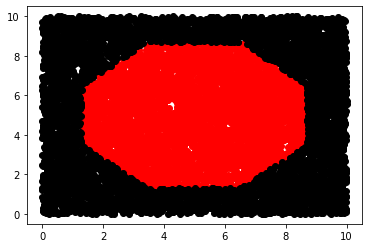

In [4]:
center = [5, 5]
r = 4

offset = -np.pi / 8 + .00001

points = r * np.array([[np.cos(i * np.pi / 4 + offset), np.sin(i * np.pi / 4 + offset)] for i in range(9)]) + center

inequalities = [[
    Inequality(get_slope_line(points[i], points[i+1]).y, '<' if i < 4 else '>') for i in range(8)
]]

df = generate_points(10000, inequalities)

c = df['y'] == 1

plt.plot(df[c].x_1, df[c].x_2, 'ro')
plt.plot(df[~c].x_1, df[~c].x_2, 'ko')
plt.show()

In [5]:
# here are some activation functions and derivatives we might use
def const(x):
    if type(x) == np.ndarray:
        return np.ones(x.shape)
    elif type(x) == list:
        return np.ones(len(x))
    else:
        return 1
    
def const_prime(x):
    if type(x) == np.ndarray:
        return np.zeros(x.shape)
    elif type(x) == list:
        return np.zeros(len(x))
    else:
        return 0
    
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))

def elu(x, a=0.01):
    return x * (x>0) + a * (np.exp(x) - 1) * (x<=0)

def elu_prime(x, a=0.01):
    return 1 * (x>0) + a * np.exp(x) * (x<=0)

def relu(x):
    return x * (x>0) + 0 * (x<=0)

def relu_prime(x):
    return 1 * (x>0) + 0 * (x<=0)

def sign(x):
    return 1 * (x > 0) + -1 * (x <= 0)